# Session 2

## Index

1. Intended learning outcomes
2. Histograms
3. Plotting error bars
4. Line fitting
5. Optional: other fitting models

## 1. Intended learning outcomes<a id="outcomes"></a>
After this session, you should be able to:
- plot a histogram of a 1D data set
- plot error bars on scatter plots
- fit a linear model to your data and plot both fit and data
- find the uncertainties on your fit parameters

## 2. Histograms<a id="histograms"></a>
In this section you will practise the array statistics you learnt last session, as well as learn to create histograms. Histograms are frequently used when displaying a set of repeated measurements, and are therefore an incredible useful tool to use for your labs.

<div style="background-color: #00FF00">
    
**Exercise 1: before you move on, import the relevant packages for plotting and scientific calculations and below. Which will you need?**

In [1]:
import scipy as sp
import matplotlib.pyplot as plt

With the matplotlib pyplot package it is straightforward to create a histogram of a data array. For the following example, we use the [Dataset.txt](https://cclewley.github.io/ComputingYr1/Data2/Dataset.txt) file, which you can find in the 'Data' folder. This data file contains 20 measurements of the speed of light (in units of $10^8\mathrm{ms}^{-1}$). The code below creates a histogram of the data. Inspect the code and subsequently run the code cell.

C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\2803212494.py:1: DeprecationWarning: scipy.loadtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.loadtxt instead
  data = sp.loadtxt('Data/Dataset.txt')# read the data from file


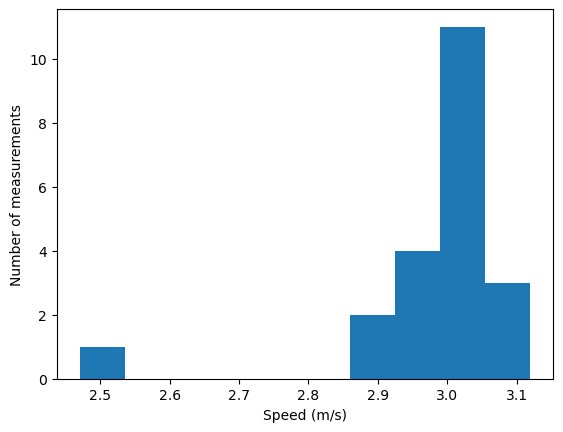

In [2]:
data = sp.loadtxt('Data/Dataset.txt')# read the data from file
plt.ylabel("Number of measurements")# set the y-label
plt.xlabel("Speed (m/s)")# set the x-label
plt.hist(data)# create a histogram of the data
plt.show()# show the plot

We can immediately see that most measurements are clustered around $c = 3.0 \times 10^8 \,\rm m/s$, but there appears to be one outlier at $\sim 2.5 \times 10^8 \,\rm m/s$. It should be clear that it is much easier to spot outliers when you plot a histogram than by looking at a table of individual measurements.

The question is whether this outlier is a mistake. If it is, we can disregard it when we calculate the mean and standard error of the mean. 
<p>
<div style="background-color: #00FF00">

**Exercise 2: inspect the data and calculate the mean and standard deviation of the entire sample to get an idea of how far away the point is. Would it be reasonable to assume a mistake was made in this measurement?**

In [3]:
mean = sp.mean(data)
sd = sp.std(data, ddof=1)
print(r"The mean of the data is %.3f ms$^-1$ and the sample standard deviation is %.3f ms$^-1$"%(mean,sd))

The mean of the data is 2.980 ms$^-1$ and the sample standard deviation is 0.129 ms$^-1$


C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\1214026243.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean = sp.mean(data)
C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\1214026243.py:2: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sd = sp.std(data, ddof=1)


We can use Python to make a new data sample without this data point using the SciPy <span style="color:blue">delete()</span> function (remember that the elements in the array start counting at 0). Note however that we do not 'delete' the data point from our data set altogether - we still record the outlier and keep it in our data file (it would be terribly bad practice to simply altogether discard data that doesn't match our expectations!). We use the <span style="color:blue">delete()</span> function to create a new array without the outlier, so we can do further statistics on this sample.

In [4]:
clean_data=sp.delete(data,5)
print(clean_data)

[3.09 2.97 3.01 3.   3.12 3.02 2.91 2.98 2.94 3.02 3.02 3.05 2.97 3.04
 2.99 2.88 2.99 3.05 2.99 3.06]


C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\3450722292.py:1: DeprecationWarning: scipy.delete is deprecated and will be removed in SciPy 2.0.0, use numpy.delete instead
  clean_data=sp.delete(data,5)


<div style="background-color: #00FF00">
    
**Exercise 3: recalculate the mean and standard deviation, and display a histogram of the new data sample. Has the result changed?**

In [5]:
mean_clean = sp.mean(clean_data)
sd_clean = sp.std(clean_data,ddof=1)
print(r"The mean of the cleaned data is %.3f m/s and the cleaned sample standard deviation is %.3f m/s"%(mean_clean,sd_clean))

The mean of the cleaned data is 3.005 m/s and the cleaned sample standard deviation is 0.057 m/s


C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\201709563.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_clean = sp.mean(clean_data)
C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\201709563.py:2: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sd_clean = sp.std(clean_data,ddof=1)


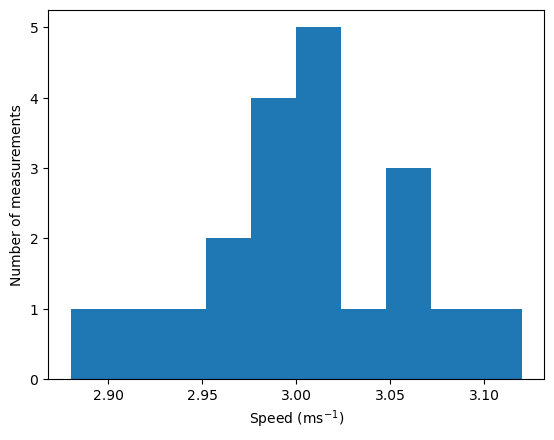

In [6]:
plt.ylabel("Number of measurements")# set the y-label
plt.xlabel("Speed (ms$^{-1}$)")# set the x-label
plt.hist(clean_data)# create a histogram of the data
plt.show()# show the plot

<div style="background-color: #FFF8C6">

We often would like to compare two datasets or plots visually; for this purpose it is helpful to plot two (or more) graphs side by side. This can be done using the <span style="color:blue">plt.subplot()</span> function to present them in a grid structure that contains $n \times m$ plots, where $n$ is the number of rows and $m$ is the number of columns. You call the <span style="color:blue">plt.subplot()</span> function like this:

```python
plt.subplot(n,m,k)
```

where n is the number of rows you want, m is the number of columns and k is the number of the plot you are creating at this moment in time.

**Exercise: Use the <span style="color:blue">plt.subplot()</span> function to plot the two histograms you created above side by side.**

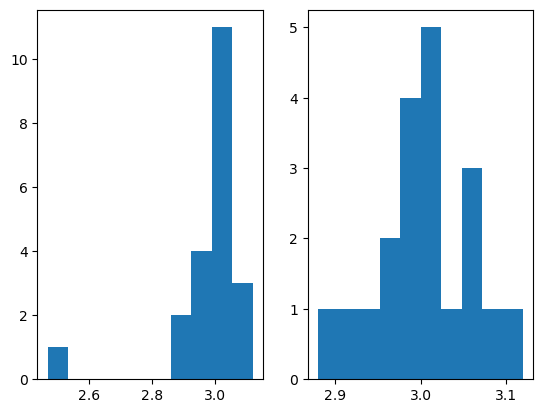

In [7]:
ax1 = plt.subplot(121)
ax1.hist(data)
ax2 = plt.subplot(122)
ax2.hist(clean_data)
plt.show()

<div style="background-color: #FFF8C6">
As physicists you will take many measurements in labs and research projects, so you need to become skilled data analysts. For example, you will need to have a good enough working knowledge of statistics to be able to decide how many measurements you need to take to obtain a satisfactory uncertainty on your estimate of the physical quantity you are measuring. The example below helps you see the effect of working with small and large data sets in practice.
<p>
Below, we will analyze five sets of data, each having 20 points. These numbers have been generated using a random number generator, and are all drawn from a normal distribution with the same mean and standard deviation. We will plot the histograms of the data sets and calculate their mean, standard deviation, and standard error of the mean to see if they are what we would expect.
<p>
    
**Exercise: read the data stored in the file [five_datasets.txt](https://cclewley.github.io/ComputingYr1/Data2/five_datasets.txt) (in the 'Data' folder) into Python. Next, for each dataset, plot a histogram and calculate the mean and standard deviation. Do the means of each set of data come out close to each other?  Are the standard deviations of each set the same?  What is the standard error of the mean of each set?  Are the differences between the means of all the sets similar to the values of the calculated standard errors?**

Tip: again use the <span style="color:blue">plt.subplot()</span> function to plot your histograms in a grid for easy comparison.

In [8]:
#loading data
data = sp.loadtxt('Data/five_datasets.txt',skiprows=1,delimiter='\t',unpack=True)

C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\2928606336.py:2: DeprecationWarning: scipy.loadtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.loadtxt instead
  data = sp.loadtxt('Data/five_datasets.txt',skiprows=1,delimiter='\t',unpack=True)


C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\4179682569.py:7: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean.append(sp.mean(data[i]))
C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\4179682569.py:8: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sd.append(sp.std(data[i],ddof=1))
C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\4179682569.py:9: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  serr.append(sd[i]/sp.sqrt(len(data[i])))


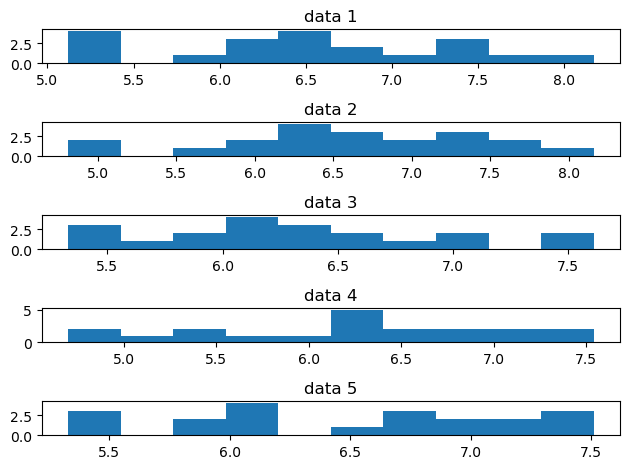

In [9]:
mean = []
sd = []
serr = []
fig,axs = plt.subplots(5,1)
#fig = plt.figure()
for i in range(len(data)):
    mean.append(sp.mean(data[i]))
    sd.append(sp.std(data[i],ddof=1))
    serr.append(sd[i]/sp.sqrt(len(data[i])))
    axs[i].hist(data[i])
    axs[i].set_title(r'data %d'%(i+1))
    #plt.hist(data[i])
    #fig.add_subplot(5,1,i+1).set_title(r'data %d'%(i+1))
fig.tight_layout()
plt.show()

In [10]:
print(mean)
print(sd)
print(serr)

[6.5025, 6.641, 6.339499999999999, 6.213500000000001, 6.499499999999999]
[0.8812901726565733, 0.8458561530064954, 0.6460851744403202, 0.8154125529932362, 0.6894961928828903]
[0.19706247339626243, 0.1891391857308987, 0.14446903693033655, 0.18233178981995257, 0.15417603575134495]


<div style="background-color: #FFF8C6">
Now we will investigate what happens when we combine the five datasets into one dataset of 100 measurements.
<p>
    
**Exercise: plot a histogram of the combined dataset (including all 100 measurements) and calculate the mean, standard deviation, and standard error of the mean. Compare this to the results from the individual datasets comprising 20 measurements. What is the difference? Write your combined dataset to a file (i.e. one column with 100 data points) and save your final histogram. Remember to save all your output in the 'Output' folder!**

Hint: you can flatten a 2D-array into a 1D-array by using the <span style="color:blue">flatten()</span> function. For example, the following line of code would flatten a (pre-existing) 2D array called 'data_array' and store it into a 1D array called 'new_1Darray':

```python
new_1Darray = data_array.flatten()
```
<span style="color:#FFF8C6">.</span>

In [11]:
#checking data type
print(type(data[0]))

<class 'numpy.ndarray'>


C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\1030626736.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  big_mean = sp.mean(big_data)
C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\1030626736.py:3: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  big_sd = sp.std(big_data,ddof=1)


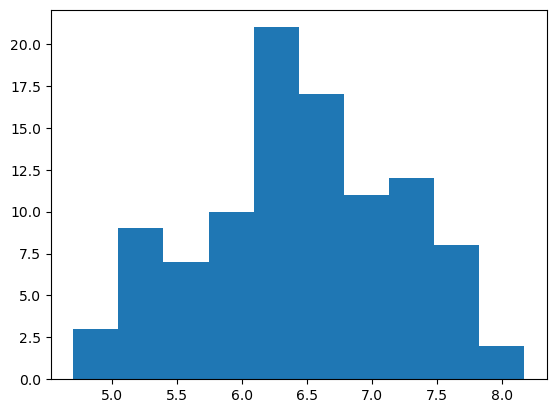

C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\1030626736.py:8: DeprecationWarning: scipy.savetxt is deprecated and will be removed in SciPy 2.0.0, use numpy.savetxt instead
  sp.savetxt('Output/Combined_data.txt',big_data,fmt='%.2f')


In [12]:
big_data = np.array([data]).flatten()
big_mean = sp.mean(big_data)
big_sd = sp.std(big_data,ddof=1)
big_seom = big_sd/np.sqrt(len(big_data))
plt.hist(big_data)
plt.savefig('Output/Combined_hist.png')
plt.show()
sp.savetxt('Output/Combined_data.txt',big_data,fmt='%.2f')

## 3. Plotting error bars<a id="errorbars"></a>
So far we have learnt to plot our data using linear plots, scatter plots, and histograms. However, normally all data we take will have errors associated with it. Our plots should include these errors in the form of error bars. Fortunately this is straightforward with matplotlib as it includes the function <span style="color:blue">errorbar()</span> which creates a plot with error bars for us. 

<div style="background-color: #00FF00">
    
**Exercise 4: have a look at the help for the <span style="color:blue">errorbar()</span> function to see which input arguments it takes. Pay particular attention to the keywords <span style="color:blue">yerr</span>, which takes an array that includes the y-error bars, and <span style="color:blue">fmt</span>, with which you specify the plotting symbol.**

**Exercise 5: load the resistivity data we used last session ([Resistivity.txt](https://cclewley.github.io/ComputingYr1/Data2/Resistivity.txt)) (included in this session's 'Data' folder), create an array containing 5% errors on the resistivity data, and plot a scatter plot of the data including error bars.**

Note: the exercise above includes little guidance - this is to help you get used to finding programming solutions to problems you have not encountered before. Start by looking through the help file, and possibly googling example uses of the function. Also feel free to discuss with your neighbours! If you still find you have trouble getting started (don't worry - this is normal for novice coders), skip ahead to the blue box below and after showing your previous results ask your demonstrator to help you on your way.

In [13]:
T,R_Cu, R_Al = sp.loadtxt('Data/Resistivity.txt', delimiter=' ',unpack=True)
print(T,R_Cu,R_Al)

[200. 220. 240. 260. 280. 300. 320. 340. 360.] [1.12e-08 1.18e-08 1.37e-08 1.52e-08 1.55e-08 1.73e-08 1.92e-08 1.99e-08
 2.16e-08] [1.76e-08 2.02e-08 2.18e-08 2.30e-08 2.68e-08 2.86e-08 3.05e-08 3.33e-08
 3.49e-08]


C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\3925403504.py:1: DeprecationWarning: scipy.loadtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.loadtxt instead
  T,R_Cu, R_Al = sp.loadtxt('Data/Resistivity.txt', delimiter=' ',unpack=True)


In [14]:
Cu_err = 0.05*R_Cu
Al_err = 0.05*R_Al

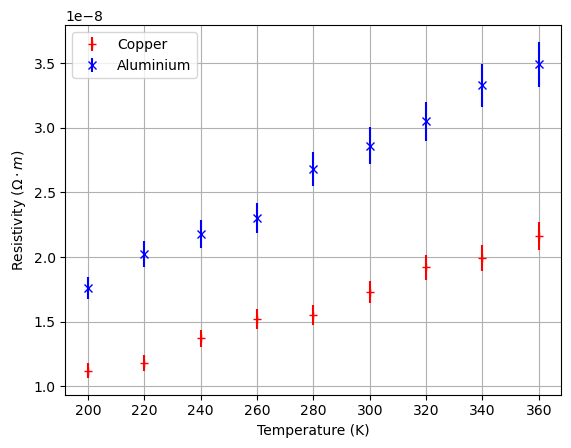

In [15]:
plt.errorbar(T,R_Cu,Cu_err,fmt='+',label='Copper',color='red')
plt.errorbar(T,R_Al,Al_err,fmt='x',label='Aluminium',color='blue')
plt.grid()
plt.xlabel('Temperature (K)')
plt.ylabel('Resistivity ($\Omega\cdot m$)')
plt.legend()
plt.show()

<div style="background-color: #FFF8C6">
You can customise many features on your error bar plot. For example, can you find out how to put caps on your error bars (so they are displayed as **T** rather than **I**)? Also, your independent variable may have error bars too, which you would need to add to your plot. 

**Exercise: add fixed temperature error bars of 2K to your plot. Check the <span style="color:blue">errorbar()</span> documentation for this!**

C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\405793133.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(T,R_Al,Al_err,T_err,fmt='bo',capsize=2,label='Aluminium',color='blue')


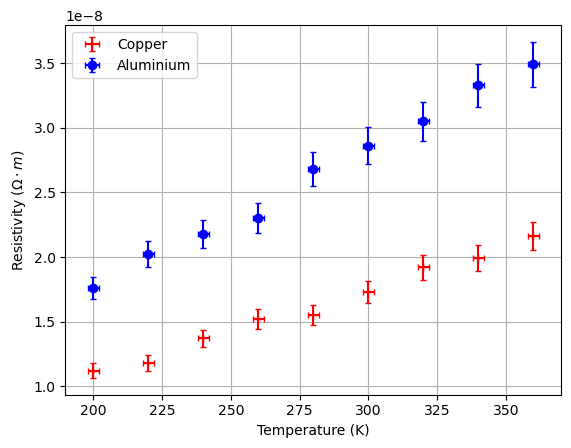

In [16]:
T_err = np.full(len(T), 2)
plt.errorbar(T,R_Cu,Cu_err,T_err,fmt='+',capsize=2,label='Copper',color='red')
plt.errorbar(T,R_Al,Al_err,T_err,fmt='bo',capsize=2,label='Aluminium',color='blue')
plt.grid()
plt.xlabel('Temperature (K)')
plt.ylabel('Resistivity ($\Omega\cdot m$)')
plt.legend()
plt.show()

<div style="background-color: #FFF8C6">
    
### Error bars on histograms
Sometimes we want to plot error bars on histograms. For example, if your histogram displays a number of counts of a certain value, you may want to add Poisson errors to each bin ($\sigma_{\rm Poisson} = \sqrt{N}$, where $N$ is the number of counts in the bin).

**Exercise (challenging): below, recreate the histogram you made in the previous section of the full dataset, and add Poisson error bars to each bin.** 

Tip: besides plotting a histogram, the matplotlib function <span style="color:blue">hist()</span> can return values too. Look this up, and use it to calculate and create the error bars with the <span style="color:blue">errorbar()</span> function. You will need to think carefully about the $x$-positions of the error bars!

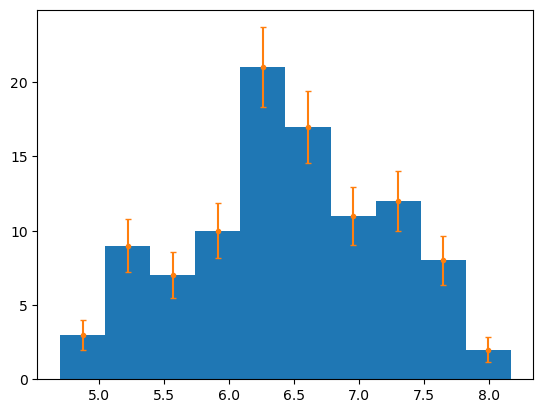

In [17]:
x = plt.hist(big_data)
density = x[0]
edge = x[1]
#print(edge)
mid = 0.5*(edge[1:]+edge[:-1])
width = edge[1:]-edge[:-1]
pois = np.sqrt(density*width)
plt.errorbar(mid,density,pois,fmt='.',capsize=2)
plt.show()

<div style="background-color: cyan"> Show your histograms and error bar plot and discuss your findings with a demonstrator - and don't forget to note down your results in your logbook! If you found that you are unclear on any of the concepts introduced during the last session, this is a good moment to talk about them with your demonstrator.</div>

## 4. Line fitting<a id="linefitting"></a>
In the last session we had noticed that the resistivity data appears to show a linear relationship with temperature. In order to find this relationship, we want to fit a straight line to our data. We will do this by using the Scipy routine <span style="color:blue">polyfit()</span>. This routine takes as arguments an array of the x values of the data, an array of the y values, and the *order* of the polynomial (what power of x) - in this case 1 for a straight line. We can then tell it to weight each data point by the inverse of its error with the <span style="color:blue">w</span> keyword, and ask it to return the uncertainty of the fit parameters by setting <span style="color:blue">cov=True</span>. Look at the documentation to see all of the available keyword arguments.

The routine returns an array which contains the best fit values for the coefficients of the polynomial ($P[0]$ and $P[1]$) 

$$ f(x) = P[1] + P[0] x $$

and a *covariance matrix* which contains the information on the uncertainties on the fit parameters *i.e.* how well we have measured the slope ($P[0]$) and intercept ($P[1]$).

$$ \left( 
\begin{array}
\ C_{00} & C_{10} \\
 C_{01} & C_{11} 
\end{array}\right)$$

We are interested in the diagonal elements of this matrix, where for instance the uncertainty on fit parameter P[1] (the intercept) :

$$\sigma_{P[1]}=\sqrt{C_{11}}$$

The other two elements of the covariance matrix describe the covariance between the two different parameters, which is something we do not need to use for our error analysis.

The code below returns the linear fit to the Aluminium resistivity data. Carefully look through this code and make sure you understand it.

In [18]:
import scipy as sp
import matplotlib.pyplot as plt

T,R_Cu,R_Al = sp.loadtxt('Data/Resistivity.txt',unpack=True)# Read in the data
errors_Al = 0.05*R_Al# Calculate 5% errors
errors_Cu = 0.05*R_Cu

# The line below stores the fit coefficients in the fit_Al variable, and the covariance matrix in the cov_Al variable.
# Note that the input arguments for polyfit() below are:
# (1) the independent variable (T)
# (2) the dependent variable (R_Al)
# (3) the order of the polynomial to be fitted (1)
# (4) the weights of each data point (w = 1/errors_Al)
# (5) whether or not to return the covariance matrix (cov = True)
fit_Al,cov_Al = sp.polyfit(T,R_Al,1,w=1/errors_Al,cov=True)
print('Aluminium fit coefficients')
print(fit_Al)
print('covariance matrix')
print(cov_Al)

sig_0 = sp.sqrt(cov_Al[0,0]) #The uncertainty in the slope
sig_1 = sp.sqrt(cov_Al[1,1]) #The uncertainty in the intercept

print('Slope = %.3e +/- %.3e' %(fit_Al[0],sig_0))# Note the %.3e forces the values to be printed in scientific notation with 3 decimal places.
print('Intercept = %.3e +/- %.3e' %(fit_Al[1],sig_1))

Aluminium fit coefficients
[ 1.08753758e-10 -4.17527741e-09]
covariance matrix
[[ 1.35506927e-23 -3.48876067e-21]
 [-3.48876067e-21  9.31137537e-19]]
Slope = 1.088e-10 +/- 3.681e-12
Intercept = -4.175e-09 +/- 9.650e-10


C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\3579315526.py:4: DeprecationWarning: scipy.loadtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.loadtxt instead
  T,R_Cu,R_Al = sp.loadtxt('Data/Resistivity.txt',unpack=True)# Read in the data
C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\3579315526.py:15: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fit_Al,cov_Al = sp.polyfit(T,R_Al,1,w=1/errors_Al,cov=True)
C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\3579315526.py:21: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  sig_0 = sp.sqrt(cov_Al[0,0]) #The uncertainty in the slope
C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\3579315526.py:22: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  sig_1 = sp.sqrt(cov_Al[1,1]) #The uncertainty in the intercept


We can now use the convenient <span style="color:blue">poly1d()</span> routine from the SciPy package, which takes the fit parameters returned by <span style="color:blue">polyfit()</span> and returns a function which calculates the corresponding fit values at any given point. We then plot the linear fit on top of our data. 

Aluminium polynomial
 
1.088e-10 x - 4.175e-09


C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\149989549.py:17: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  plt.xticks(sp.arange(200, 400, 50))


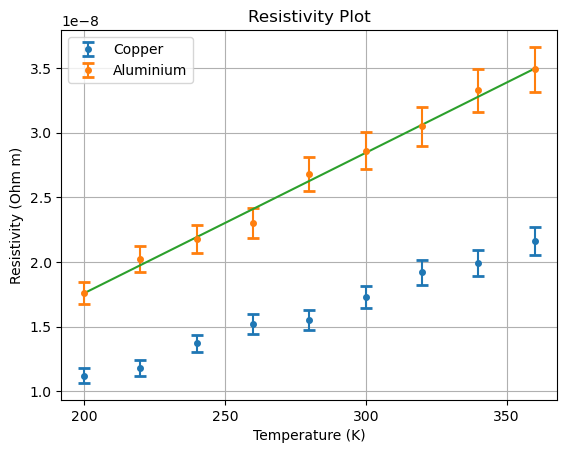

In [19]:
import scipy as sp
import matplotlib.pyplot as plt

# Calculate the fit 
pAl=sp.poly1d(fit_Al)
print('Aluminium polynomial')
print(pAl)

# Create the original data figure with error bars
plt.grid()
plt.xlabel("Temperature (K)") 
plt.ylabel("Resistivity (Ohm m)") 
plt.title("Resistivity Plot") 
plt.errorbar(T,R_Cu,yerr=errors_Cu, fmt='o', mew=2, ms=3, capsize=4)
plt.errorbar(T,R_Al,yerr=errors_Al, fmt='o', mew=2, ms=3, capsize=4)
plt.legend(["Copper", "Aluminium"], loc=2 ) 
plt.xticks(sp.arange(200, 400, 50))

# Overlay the linear fit
# Note that we create the y-coordinates for the fit data points by calling pAl 
# (which was the return value of poly1Dfit), with the x-coordinates stored in T as the input argument.
plt.plot(T,pAl(T))
plt.show()

The above is quite a complicated piece of code. It is therefore important to understand what exactly is going on. Answer the below questions to help you gain a better understanding - make sure to note the answers down in your labbook.

<div style="background-color: #00FF00">
    
**Exercise 6: To understand what exactly is returned by the function <span style="color:blue">polyfit()</span>, find out the data types of <span style="color:blue">fit_Al</span> and <span style="color:blue">cov_Al.</span>**

**Next, to check what the command <span style="color:blue">pAl(T)</span>  does, plot the linear fit with crosses as symbols, rather than a line. In order to do this, edit the following line in the code cell above:**
```python
plt.plot(T,pAl(T))
```
**Use the <span style="color:blue">pAl()</span> command to calculate the predicted value of the Resistivity at 250 K and 400 K. Check that your answer is sensible by inspecting the above plot of the fit together with the data.**

**Now explain the <span style="color:blue">pAl(T)</span> command to a neighbour and/or a demonstrator.**

In [20]:
print(r'Resistivity at 250 K is %.3e'%(pAl(250)))
print(r'Resistivity at 400 K is %.3e'%(pAl(400)))

Resistivity at 250 K is 2.301e-08
Resistivity at 400 K is 3.933e-08


<div style="background-color: #00FF00">
    
**Exercise 7: now we have created and plotted the linear fit to the Aluminium resistivity data, can you do the same for the Copper resistivity data? Your final output should be a scatter plot of the data including error bars and both linear fits.**

In [21]:
fit_Cu,cov_Cu = sp.polyfit(T,R_Cu,1,w=1/errors_Cu,cov=True)
pCu = sp.poly1d(fit_Cu)

C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\61741366.py:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fit_Cu,cov_Cu = sp.polyfit(T,R_Cu,1,w=1/errors_Cu,cov=True)


C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\542696656.py:8: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  plt.xticks(sp.arange(200, 400, 50))


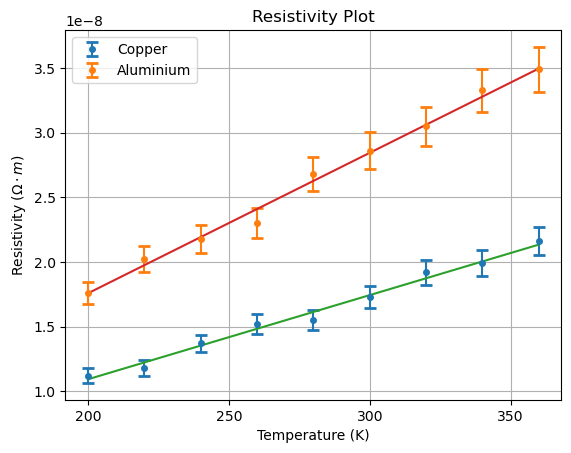

In [22]:
plt.grid()
plt.xlabel("Temperature (K)") 
plt.ylabel("Resistivity ($\Omega\cdot m$)") 
plt.title("Resistivity Plot") 
plt.errorbar(T,R_Cu,yerr=errors_Cu, fmt='o', mew=2, ms=3, capsize=4)
plt.errorbar(T,R_Al,yerr=errors_Al, fmt='o', mew=2, ms=3, capsize=4)
plt.legend(["Copper", "Aluminium"], loc=2 ) 
plt.xticks(sp.arange(200, 400, 50))
plt.plot(T,pCu(T))
plt.plot(T,pAl(T))
plt.show()

<div style="background-color: #FFF8C6">
    
### A further investigation into the impact of measurement uncertainties.
The data we have used so far has been nearly ideal: there is little variance around the linear fit. In practice, data is often a lot noisier, i.e. the measured data points will show more scatter around the fit. To illustrate this, have a look at the file [noisy_data.txt](https://cclewley.github.io/ComputingYr1/Data2/noisy_data.txt) (in the 'Data' folder), which includes a noisier set of measurements of the Aluminium resistivity. The file contains three columns: the temperature, the resistivity measurement, and an error on the resistivity measurement. Upon inspection of the file, you will notice that the measurement errors are variable; below we will investigate the impact of the size of the errors on the linear fit.

**Exercise: start by reading in the noisy data set, and plotting it (with error bars) below.**

C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\4267831822.py:1: DeprecationWarning: scipy.loadtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.loadtxt instead
  T,Res,Err = sp.loadtxt('Data/noisy_data.txt',delimiter=' ',unpack=True)


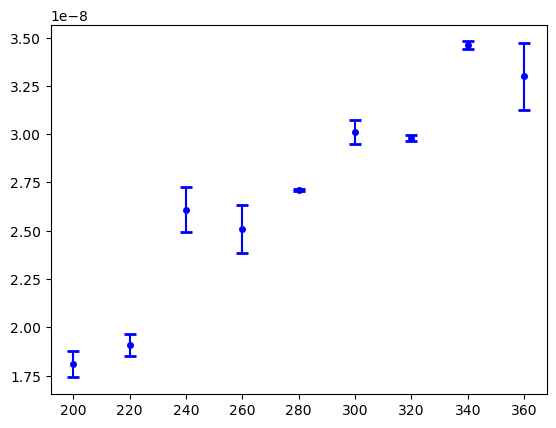

In [23]:
T,Res,Err = sp.loadtxt('Data/noisy_data.txt',delimiter=' ',unpack=True)
Err = abs(Err)
plt.errorbar(T,Res,Err,fmt='bo',mew=2, ms=3, capsize=4)
plt.show()

<div style="background-color: #FFF8C6">
As you can see, the data points are clearly more scattered, although the linear relationship is still apparent. 
<p>
    
**Exercise: below, create two fits to the data: one that weights each data point by the inverse of its error, and one that does not take the errors into account. Overplot both on your data plot.**

In [24]:
#weighted
wfit,wcov = sp.polyfit(T,Res,1,w=1/Err,cov=True)
wpoly = sp.poly1d(wfit)

C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\1841481584.py:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  wfit,wcov = sp.polyfit(T,Res,1,w=1/Err,cov=True)


In [25]:
#unweighted
fit,cov = sp.polyfit(T,Res,1,cov=True)
poly = sp.poly1d(fit)

C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\3295319949.py:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fit,cov = sp.polyfit(T,Res,1,cov=True)


C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\2787068229.py:6: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  plt.xticks(sp.arange(200, 400, 50))


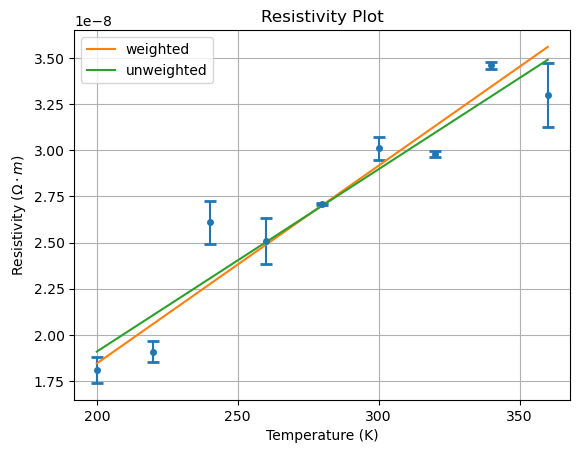

In [26]:
plt.grid()
plt.xlabel("Temperature (K)") 
plt.ylabel("Resistivity ($\Omega\cdot m$)") 
plt.title("Resistivity Plot") 
plt.errorbar(T,Res,yerr=Err, fmt='o', mew=2, ms=3, capsize=4)
plt.xticks(sp.arange(200, 400, 50))
plt.plot(T,wpoly(T),label='weighted')
plt.plot(T,poly(T), label='unweighted')
plt.legend()
plt.show()

<div style="background-color: #FFF8C6">
You should now see that the unweighted fit tries to take all data points into account equally. However, the weighted fit takes into account that the third and last data points have large error bars and therefore creates a steeper fit to accommodate the points with small error bars. 
<p>
    
**Exercise: investigate this further by manually adjusting the size of the uncertainties of individual data points. Can you predict how the fit will change?**

The work you have just done highlights the importance of assigning realistic uncertainty estimates to your datapoints. Note however that in reality you should *never* manually adjust the size of the error bars just to create the fit you want! You should always be able to justify the size of your uncertainty estimate - if all measurements were taken in a similar way they will usually have a similar absolute or fractional error.

### Practical example

Let's consider an experiment where the resistance of a pair of identical resistors is to be found. In this experiment, a measurement is made of the voltage difference across the two resistors and the current running through them is also measured. The resistance of each resistor can be described by the equation:<p>
$$R= \frac{1}{2}\frac{V_1 −V_2}{I},$$<p>
where $V_1$ and $V_2$ are the voltages at the two ends of the resistors and $I$ is the current through them.

Consider two approaches to finding the value of $R$:

1. We take one measurement of each of $V_1$, $V_2$ and $I$ and accept the equipment manufacturer’s error estimates giving the following values: $V_1 = 6.9 \pm 0.5 \rm\, V$, $V_2 = 0.7 \pm 0.1 \rm \,V$ and $I = 0.43 \pm 0.03\rm\, A$. Find a value for $R$ and its error $\sigma_R$ using the appropriate methods for combining errors. <p>

2. We take a series of measurements of $V_1$, $V_2$ and $I$ with results as given in [Resistors.csv](https://cclewley.github.io/ComputingYr1/Data2/Resistors.csv). Plot $(V_1 − V_2)$ against $I$ and use a linear fit to find $R$ and $\sigma_R$.

<div style="background-color: #00FF00">
    
**Exercise 8: use both methods to calculate the resistance $R$ and its associated error with Python. Do the two approaches give the same results?**

In [27]:
#method 1
R = 0.5*(6.9-0.7)/0.43
sigR = (0.6/(6.9-0.7)+0.03/0.43)*R
print(r'Using  method 1, the resistance is %.3f +- %.1f Ohms'%(R,sigR))

Using  method 1, the resistance is 7.209 +- 1.2 Ohms


C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\2383267446.py:2: DeprecationWarning: scipy.loadtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.loadtxt instead
  I,DV = sp.loadtxt('Data/Resistors.csv',skiprows=2,delimiter=',',unpack=True)
C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\2383267446.py:3: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fit,cov = sp.polyfit(I,DV,1,cov=True)


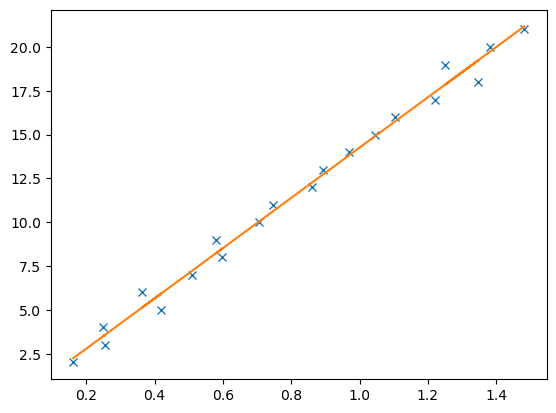

Using  method 2, the resistance is 7.171 +- 0.3 Ohms


C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\2383267446.py:8: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  sigR = sp.sqrt(cov[0,0])


In [28]:
#method 2
I,DV = sp.loadtxt('Data/Resistors.csv',skiprows=2,delimiter=',',unpack=True)
fit,cov = sp.polyfit(I,DV,1,cov=True)
plt.plot(I,DV,'x')
plt.plot(I,fit[0]*I+fit[1])
plt.show()
R = 0.5*fit[0]
sigR = sp.sqrt(cov[0,0])
print(r'Using  method 2, the resistance is %.3f +- %.1f Ohms'%(R,sigR))

<div style="background-color: cyan"> Show your linear fits and error bar plots to a demonstrator - and don't forget to note down your findings in your logbook!</div>

<div style="background-color: #FFF8C6">
    
## 5. Optional: other fitting models<a id="nonlinear"></a>
### Higher-order polynomial fits
So far we have only considered fitting straight lines to a dataset. More complex relationships might require the relationship to be represented by e.g. a higher-order polynomial or an exponential function. In the following exercise we will try to fit a second-order polynomial to the atmospheric CO$_2$ concentration, which can be found in [CO2_data.csv](https://cclewley.github.io/ComputingYr1/Data2/CO2_data.csv) (in the 'Data' folder).

**Exercise: read in the CO$_2$ data set and plot it.** 

C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\721832466.py:1: DeprecationWarning: scipy.loadtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.loadtxt instead
  year,ppm = sp.loadtxt('Data/CO2_data.csv',skiprows=2,delimiter=',',unpack=True)


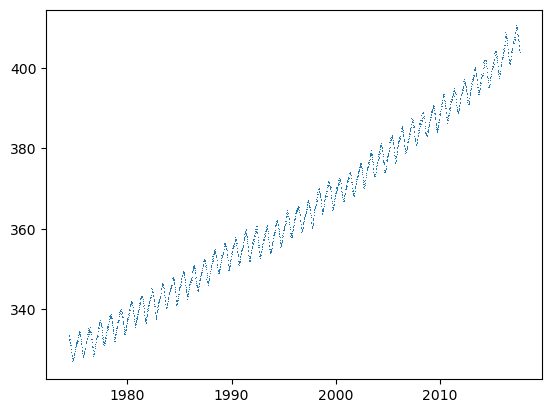

In [29]:
year,ppm = sp.loadtxt('Data/CO2_data.csv',skiprows=2,delimiter=',',unpack=True)
plt.plot(year,ppm,',')

<div style="background-color: #FFF8C6">
The CO$_2$ concentration varies periodically; this is caused by the change in uptake of CO$_2$ by vegetation during the seasons. However, there is also a year-on-year increase in the CO$_2$ concentration. 


**Exercise: fit the trend with a straight line, and overplot the result.**

C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\2624684849.py:1: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fit = sp.polyfit(year,ppm,1)


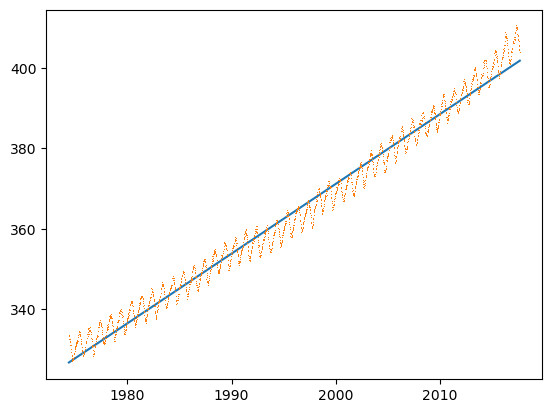

In [30]:
fit = sp.polyfit(year,ppm,1)
plt.plot(year,fit[0]*year+fit[1])
plt.plot(year,ppm,',')
plt.show()

<div style="background-color: #FFF8C6">
It doesn't look like a straight line is the appropriate fit to the trend. This is even more clearly seen when a residuals plot is created, which shows the data minus the fit. 

**Exercise: below, subtract the fitted values from the measured data points and show the residuals plot. Important note: store your residuals in a variable called 'residuals', for further use later on.**

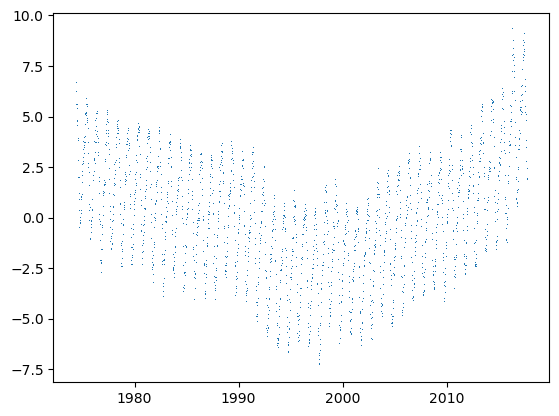

In [31]:
#residuals
res = ppm-(fit[0]*year+fit[1])
plt.plot(year,res,',')
plt.show()

<div style="background-color: #FFF8C6">
This shows there is clearly further structure in the trend. We can use the <span style="color:blue">polyfit()</span> function to fit a second order polynomial to the CO$_2$ concentration data. This will give a fit of the form:

$$ f(x) = P[2] + P[1] x + P[0] x^2. $$

Here $P[0]$, $P[1]$, and $P[2]$ are the fit parameters. A third order fit would give:

$$ f(x) = P[3] + P[2] x + P[1] x^2 + p[0] x^3. $$

The <span style="color:blue">polyfit()</span> function can create arbitrarily high orders of polynomial fits; however it is best to use the lowest order of polynomial that gives a good fit in order to avoid 'overfitting'.

**Exercise: fit a polynomial of a higher order to the data and recreate your data plot with the fit overplotted. Also recreate the residual plot. Which order of polynomial would you pick to fit the trend?**

C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\1270360172.py:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fit2 = sp.polyfit(year,ppm,2)


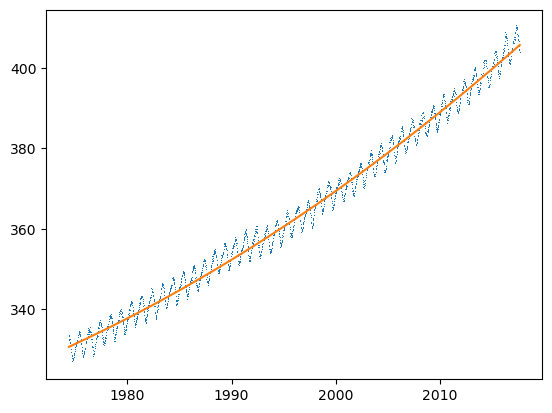

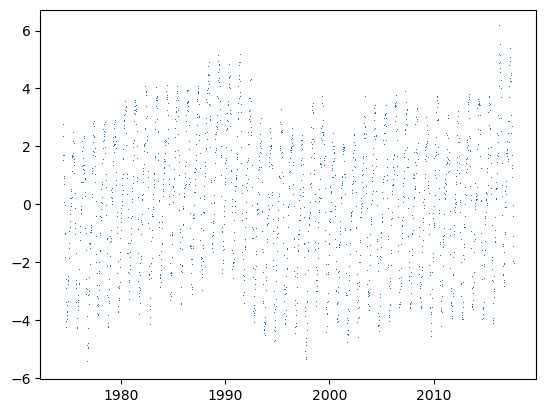

In [32]:
#order 2
fit2 = sp.polyfit(year,ppm,2)
plt.plot(year,ppm,',')
plt.plot(year, fit2[0]*year**2+fit2[1]*year+fit2[2])
plt.show()
#residuals
res2 = ppm-(fit2[0]*year**2+fit2[1]*year+fit2[2])
plt.plot(year,res2,',')
plt.show()

C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\3922101638.py:2: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fit3 = sp.polyfit(year,ppm,3)


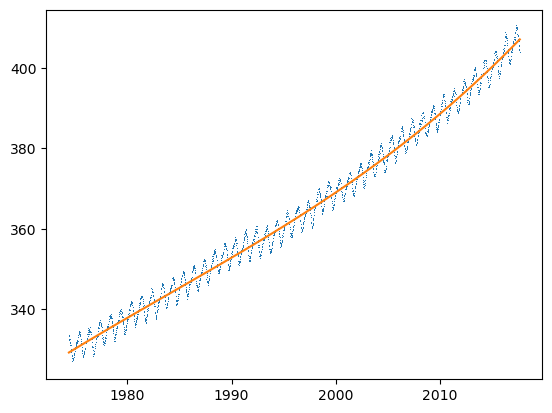

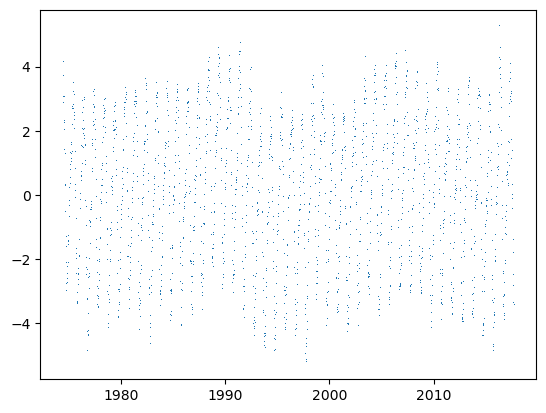

In [33]:
#order 3
fit3 = sp.polyfit(year,ppm,3)
plt.plot(year,ppm,',')
plt.plot(year, fit3[0]*year**3+fit3[1]*year**2+fit3[2]*year+fit3[3])
plt.show()
#residuals
res3 = ppm-(fit3[0]*year**3+fit3[1]*year**2+fit3[2]*year+fit3[3])
plt.plot(year,res3,',')
plt.show()

<div style="background-color: #FFF8C6">
    
### Non-linear fits

If you plot your residuals as a line plot, you can see the periodic variability in the data. To test whether this really is a yearly cycle (as posited earlier), we are going to fit a sine function to the residuals, of the form:

$$ f(t) = A\sin\Big({\frac{2\pi}{T}t+\phi}\Big) $$

Here $A$ is the amplitude, $T$ is the period, $t$ is time, and $\phi$ is the phase offset of the sine function. This is an example of a non-linear function because one of the coefficients, in this case $T$, is within the sine function (see the Advanced worksheet for a full definition of linear vs non-linear functions). 

There is no pre-built routine that fits a sine function; instead we have to use the generic <span style="color:blue">curve_fit()</span> function which is in the scipy.optimize package. The <span style="color:blue">curve_fit()</span> function allows us to define our own fit function. Below is the example code to create our sine function fit. Carefully read through the code before running it; note how the fit function is defined in a function that we have called <span style="color:blue">my_sin</span>, and we have to specificy an initial guess for the fit parameters. We do this because the fit is non-linear; all non-linear fits have to be done via iteration, where an initial guess is refined until it convergences onto an answer.

The fit parameters are:  [ 0.99961334 -2.97010161 -1.99329493]


C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\4099130479.py:3: DeprecationWarning: scipy.loadtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.loadtxt instead
  year,CO2=sp.loadtxt('Data/CO2_data.csv',skiprows=2, delimiter=',',unpack=True)# Load the data
C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\4099130479.py:7: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  return amplitude*sp.sin(t * 2*sp.pi/period + phase)


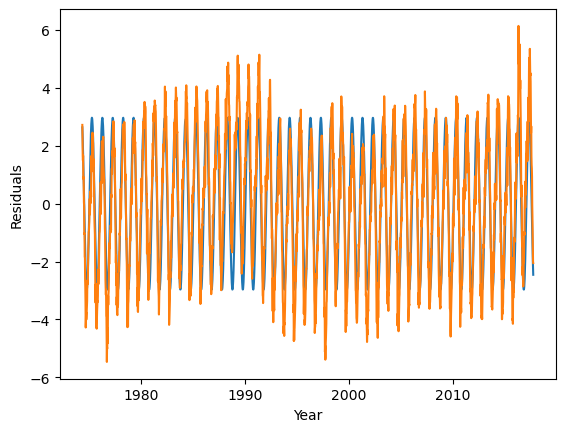

In [34]:
from scipy.optimize import curve_fit# Import the function curve_fit from the optimize package in Scipy

year,CO2=sp.loadtxt('Data/CO2_data.csv',skiprows=2, delimiter=',',unpack=True)# Load the data

# This is the function we want to fit - you will learn how to create a function from scratch in the next session.
def my_sin(t, period, amplitude, phase):
    return amplitude*sp.sin(t * 2*sp.pi/period + phase)

# Our initial guess for the parameters
guess_period = 1# Period in years
guess_amplitude = 2
guess_phase = sp.pi

p0=[guess_period, guess_amplitude, guess_phase]# Array of initial parameter values

# now do the fit
# curve_fit arguments: 
# 1. the name of the function to fit (my_sin)
# 2. the independent function values (year)
# 3. the dependent function values to be fitted 
#    (note that here we are fitting to the data stored in a variable named 'residuals' which you evaluated earlier)
# 4. an array with the initial parameter values (p0 = p0)
fit = curve_fit(my_sin, year, res2, p0=p0)
# The fit variable contains the optimized parameters as its first element, and the covariance matrix as its second element.
print('The fit parameters are: ',fit[0])

# recreate the fitted curve using the optimized parameters
# The *fit[0] notation 'unpacks' the first element of the fit. It is the same as saying: 
# fit[0][0], fit[0][1], fit[0][2] (each of which contains one of the optimized variables)
data_fit = my_sin(year, *fit[0])

# Create a plot of the fit with the residuals overlaid.
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.plot(year,data_fit)
plt.plot(year,res2)
plt.show()


<div style="background-color: #FFF8C6">
You can see that the peaks and troughs in the residuals are well matched by the fit (although our fit has a fixed amplitude whereas the residuals clearly are more variable). If you pay attention to the printed fit parameters, you will see that the fitted period is very close to 1, i.e. there is indeed a yearly cycle in the data. Our initial guess of a period of 1 year was very good, which allowed the fitting routine to find the optimized parameters rapidly and accurately. It is very important to have good starting values, otherwise the fit might make no sense at all. You often only notice this when you actually plot the fit on top of the data! 
<p>
    
**Exercise: our particular fit function is extremely sensitive to the starting value of the period: try and change the initial guess for the period in the code above and see what happens. What happens when you change the starting guess for the other fit parameters?**
<p>
We have now fitted the CO$_2$ concentration data with a sine function to represent the yearly variability and a polynomial to represent the overall trend. The two fits added together are our best fit for the data as a whole. 
<p>
    
**Exercise: plot a graph of the full CO$_2$ concentration data with the total fit overlaid.**

C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\4099130479.py:7: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  return amplitude*sp.sin(t * 2*sp.pi/period + phase)


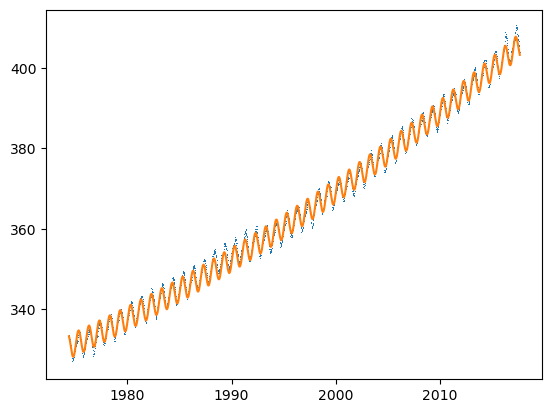

In [35]:
def final_fit(x):
    return my_sin(x, *fit[0])+(fit2[0]*x**2+fit2[1]*x+fit2[2])
plt.plot(year, CO2,',')
plt.plot(year, final_fit(year))
plt.show()

<div style="background-color: #FFF8C6">
Normally when we try and fit a function, we first decide what kind of function makes physical sense. When you expect a linear relationship, it is sensible to fit a straight line. In the data above however, we fitted a polynomial of arbitrary order to the trend, without a theoretical reason for it. In the case of the atmospheric CO$_2$ concentration, it is more common to fit an exponential curve (a good fit would then indicate "exponential growth"). 
<p>
    
**Exercise: create an exponential fit to the trend by using the <span style="color:blue">curve_fit()</span> function. To do this, first copy the <span style="color:blue">my_sin</span> function from the code cell above, change its name to <span style="color:blue">my_exp</span> and alter it to return a function of the form:**

$$f(t) = P[2] + P[1]e^{P[0]t}$$

**Here $P[0]$, $P[1]$, and $P[2]$ are the fit parameters, and $t$ is the time in years. Make sure your <span style="color:blue">curve_fit()</span> function calls your new <span style="color:blue">my_exp</span> function instead of <span style="color:blue">my_sin</span>!**

Hint: subtract the starting year from your time array so that it starts at 1 instead of around 1960. Also, as you have seen when we tried to fit a sine function, the initial guess of the fit is very important. To make an educated guess of the initial parameters, first plot the data and your guess by hand so you can choose an offset and exponent that are at least of the right order of magnitude.

C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\785389813.py:2: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return intercept+amplitude*sp.exp(freq*t)


The fit parameters are:  [1.48719537e-02 8.31725687e+01 2.46835477e+02]


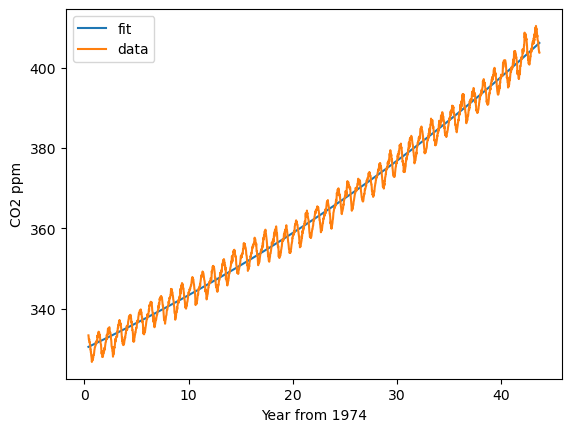

In [36]:
def my_exp(t, freq, amplitude, intercept):
    return intercept+amplitude*sp.exp(freq*t)

dt = year-1974
p0=[0.01, 100, 100]

fit = curve_fit(my_exp, dt, ppm, p0=p0)
print('The fit parameters are: ',fit[0])


data_fit = my_exp(dt, *fit[0])

# Create a plot of the fit with the residuals overlaid.
plt.xlabel('Year from 1974')
plt.ylabel('CO2 ppm')
plt.plot(dt,data_fit,label='fit')
plt.plot(dt,ppm,label='data')
plt.legend()
plt.show()

<div style="background-color: cyan"> Show your CO2 fits and plots to a demonstrator and discuss your findings.</div>

<div style="background-color: #FFF8C6">
    
### Example: scanning experiment fitting
The data below, contains what we think to be a Gaussian “feature” in a scanning experiment (it could be a spectral line in optics or a mass scan in particle physics or many other physical situations). This “feature” sits on top of a background. You can assume the background is linear, but not necessarily flat. 

C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\3640303718.py:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  x = sp.array([ 100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,  108.,
C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\3640303718.py:7: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  y = sp.array([ 49.62351587,  53.28471702,  70.91469338,  59.347993  ,
C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\3640303718.py:20: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  y_error = sp.array([ 7.74596669,  7.68114575,  7.61577311,  7.54983444,  7.48331477,


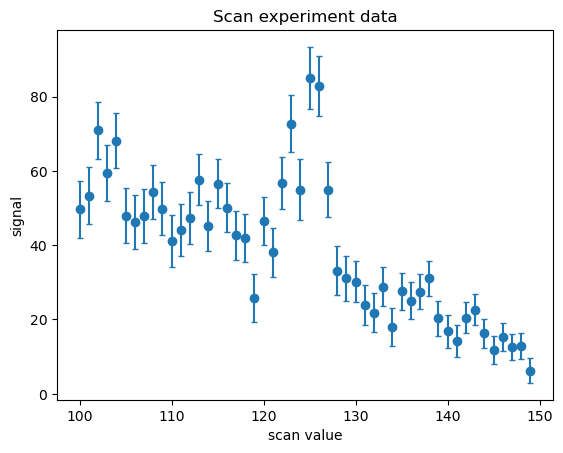

In [37]:
x = sp.array([ 100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,  108.,
        109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,  117.,
        118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,  126.,
        127.,  128.,  129.,  130.,  131.,  132.,  133.,  134.,  135.,
        136.,  137.,  138.,  139.,  140.,  141.,  142.,  143.,  144.,
        145.,  146.,  147.,  148.,  149.])
y = sp.array([ 49.62351587,  53.28471702,  70.91469338,  59.347993  ,
        68.14021339,  47.96831052,  46.27111237,  47.75670421,
        54.27684285,  49.79369344,  41.06072665,  43.95823631,
        47.32189537,  57.59658829,  45.18881389,  56.58866369,
        50.1240723 ,  42.6683265 ,  41.92068127,  25.85132307,
        46.60808952,  38.07772697,  56.7941344 ,  72.65808868,
        54.94790233,  84.97532661,  82.91663574,  54.97400141,
        33.05466879,  31.07916615,  30.20075973,  23.87661428,
        21.81024528,  28.83273888,  17.92903416,  27.57351836,
        25.05685919,  27.4866161 ,  31.13142432,  20.26710321,
        16.80327091,  14.1787744 ,  20.52320243,  22.65700337,
        16.23164708,  11.78551076,  15.21441115,  12.58749491,
        12.88956241,   6.24572757])
y_error = sp.array([ 7.74596669,  7.68114575,  7.61577311,  7.54983444,  7.48331477,
        7.41619849,  7.34846923,  7.28010989,  7.21110255,  7.14142843,
        7.07106781,  7.        ,  6.92820323,  6.85565464,  6.78233068,
        6.70821365,  6.63335528,  6.55833372,  6.48664491,  6.43341394,
        6.44498198,  6.61337546,  7.02586908,  7.63076491,  8.17847123,
        8.36660027,  8.05527104,  7.36400523,  6.58504642,  5.97802099,
        5.61585191,  5.42114516,  5.29873213,  5.1972821 ,  5.09915702,
        5.00001304,  4.89898045,  4.79583158,  4.69041576,  4.5825757 ,
        4.47213596,  4.35889894,  4.24264069,  4.12310563,  4.        ,
        3.87298335,  3.74165739,  3.60555128,  3.46410162,  3.31662479])

plt.errorbar(x, y, y_error, fmt='o',capsize=2)
plt.xlabel('scan value')
plt.ylabel('signal')
plt.title('Scan experiment data')
plt.show()

<div style="background-color: #FFF8C6">
    
**Exercise: use the <span style="color:blue">curve_fit()</span> function to fit a straight line for the background and a Gaussian function for the feature. Hence, find the amplitude and width of the Gaussian feature. Note that in this case it is not a good idea to fit the line first and afterwards the Gaussian from the residuals, as the Gaussian will influence the line fit. Instead, fit both background and the Gaussian feature at once.**

This last exercise is challenging and integrates everything you have learnt about fitting so far. First write down in your log book what the function you want to fit would look like. Which are the parameters you need to fit? Remember to make a good first guess of the fitting parameters by closely the inspecting the plot above.


In [40]:
def fit_func(x,a,mu,sig,m,c):
    gaus = a*sp.exp(-(x-mu)**2/(2*sig**2))
    line = m*x+c 
    return gaus + line

p0=[40, 125, 2, 0.4, 180]

fit = curve_fit(fit_func, x,y,p0, y_error)
print('The fit parameters are: ',fit[0])

x_plot = np.arange(100,150,0.1)
data_fit = fit_func(x_plot, *fit[0])

The fit parameters are:  [ 46.29748021 124.88996479   1.76357683  -0.99911859 159.48206858]


C:\Users\Dong Ha\AppData\Local\Temp\ipykernel_22252\1619510827.py:2: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  gaus = a*sp.exp(-(x-mu)**2/(2*sig**2))


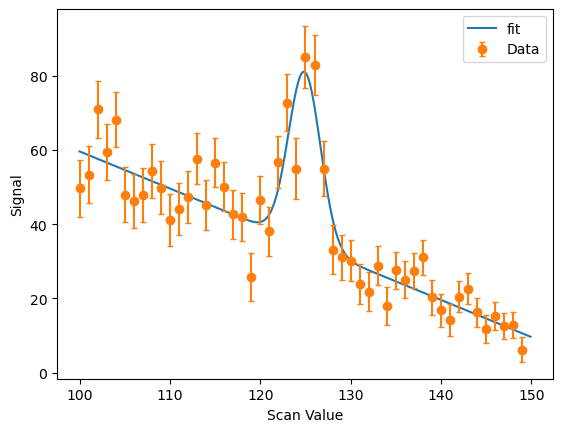

In [41]:
# Create a plot of the fit with the residuals overlaid.
plt.xlabel('Scan Value')
plt.ylabel('Signal')
plt.plot(x_plot,data_fit,label='fit')
plt.errorbar(x, y, y_error, fmt='o',capsize=2, label='Data')
plt.legend()
plt.show()

<div style="background-color: cyan"> Show your scanning experiment fit and plots to a demonstrator - and don't forget to note down your findings in your logbook!</div>

## Please complete the [Mentimeter Poll](https://www.menti.com/frcgzsqcia) for this session 